In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

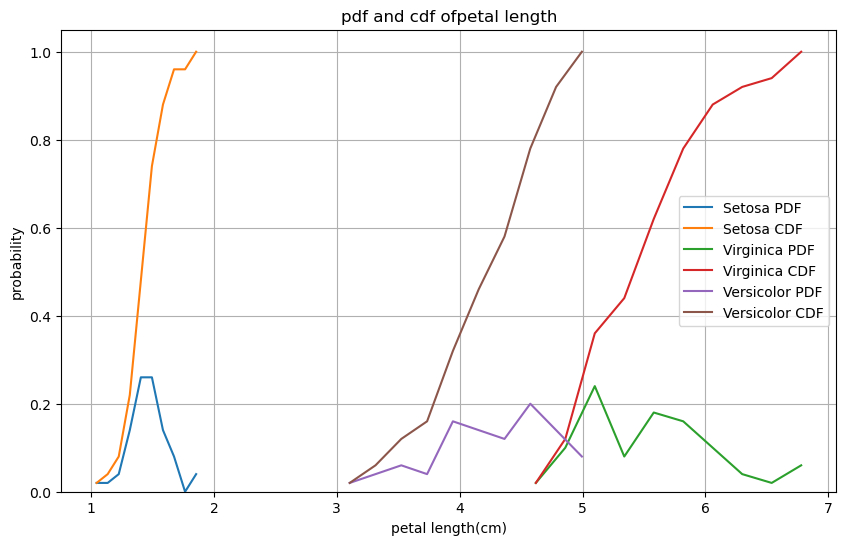

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#load iris dataset
iris_data=load_iris()
iris=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species']=iris_data.target
iris['species']=iris['species'].map({0:'setosa',1:'versicolor',2:'virginica'})

#create subsets for each species
iris_setosa=iris[iris['species']=='setosa']
iris_versicolor=iris[iris['species']=='versicolor']
iris_virginica=iris[iris['species']=='virginica']

#set up the plot
plt.figure(figsize=(10,6))

#function to plot the pdf and cdf
def plot_pdf_cdf(data,label):
    counts,bin_edges=np.histogram(data,bins=10,density=True)
    bin_centers=(bin_edges[:-1]+bin_edges[1:])/2
    
    pdf=counts*np.diff(bin_edges)#proper normalization
    pdf=pdf/np.sum(pdf)  #sum of pdf will be 1
    cdf=np.cumsum(pdf)

    plt.plot(bin_centers,pdf ,label=f'{label} PDF')
    plt.plot(bin_centers,cdf,label=f'{label} CDF')

#plot for each species
plot_pdf_cdf(iris_setosa['petal length (cm)'],'Setosa')
plot_pdf_cdf(iris_virginica['petal length (cm)'],'Virginica')
plot_pdf_cdf(iris_versicolor['petal length (cm)'],'Versicolor')

#final plot setting
plt.xlabel('petal length(cm)')
plt.ylabel('probability')
plt.title('pdf and cdf ofpetal length')
plt.ylim(0,1.05)#this forces y axis
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#when there is suppose the petal length  p<=2 then it would be setosa that can be classified 
#similarly for the p>=2 and p<5 woulbe be classifies as the Viginica 
#p>=2 and p>5 that is classified as the Versicolor on the basis of this PDF graph